# Install module

In [1]:
!pip install wave
!pip install numpy
!pip install matplotlib

# Import Module

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import math

In [3]:
audio = wave.open("cover_audio.wav",'rb')

In [4]:
audio

In [5]:
frame = bytearray(list(audio.readframes(audio.getnframes())))


In [6]:
print("Enter te secret message : \n")
message = input("")
message = message+ '#####'

Enter te secret message : 

txt = "apple#banana#cherry#orange"  x = txt.split("#")  print(x)


# Encrypt


In [7]:

message = message + int((len(frame)-(len(message)*8*8))/8) *'#'
bits = list(map(int, ''.join([bin(ord(i)).lstrip('0b').rjust(8,'0') for i in message])))
for i, bit in enumerate(bits):
    frame[i] =bit | (2**8-2 & frame[i])
frame_modified = bytes(frame)
with wave.open('newSong.wav', 'wb') as ns:
    ns.setparams(audio.getparams())
    ns.writeframes(frame_modified)
audio.close()

In [8]:
audio.getnframes()

1779533

In [9]:
encode_audio=wave.open('newSong.wav')

In [10]:
encode_audio

# Plot Original and Encoded

<ipython-input-11-bb99fe16019f>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal = np.fromstring(signal, np.int16)
<ipython-input-11-bb99fe16019f>:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal = np.fromstring(signal, np.int16)


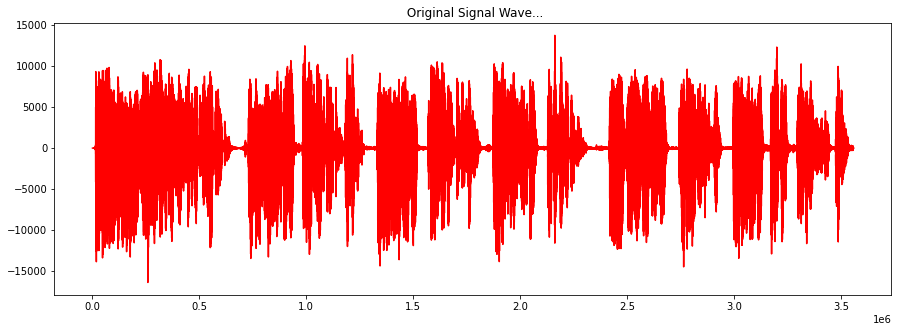

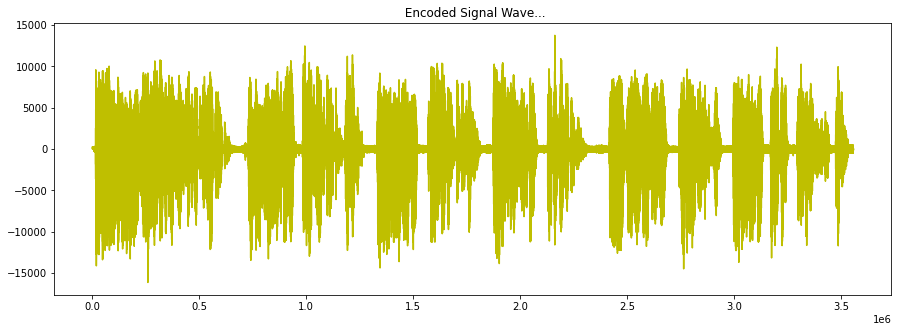

In [11]:
spf = wave.open("cover_audio.wav", "r")
# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, np.int16)
fs = spf.getframerate()
plt.figure(figsize=(15,5))
plt.title(" Original Signal Wave...")
plt.plot(signal,"r")
spf1 = wave.open("newSong.wav", "r")
# Extract Raw Audio from Wav File
signal = spf1.readframes(-1)
signal = np.fromstring(signal, np.int16)
fs = spf.getframerate()
plt.figure(figsize=(15,5))
plt.title(" Encoded Signal Wave...")
plt.plot(signal,'y')
plt.show()

# PLOT DIFFERENCE

<ipython-input-14-96fd1aef6ea8>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal = np.fromstring(signal, np.int16)
<ipython-input-14-96fd1aef6ea8>:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal1 = np.fromstring(signal, np.int16)


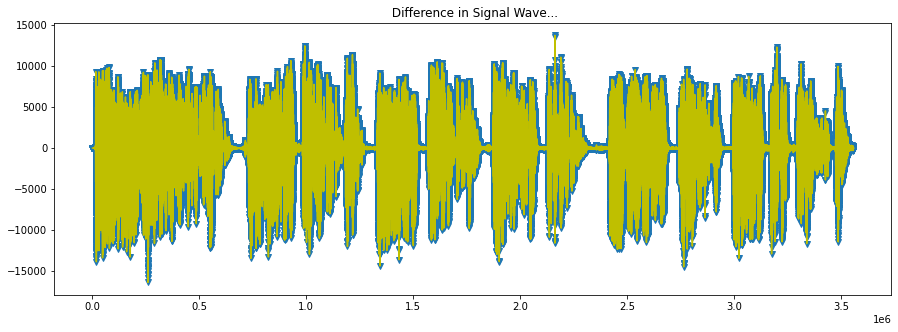

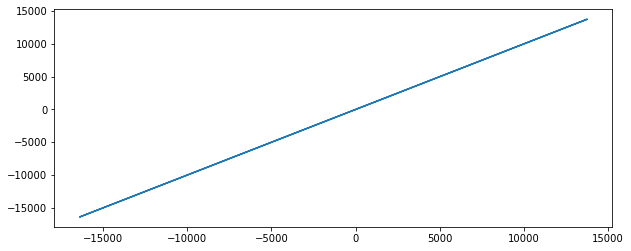

In [14]:
spf = wave.open("cover_audio.wav", "r")
# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, np.int16)
fs = spf.getframerate()
plt.figure(figsize=(15,5))
plt.title(" Difference in Signal Wave...")
plt.plot(signal,"v")
spf1 = wave.open("newSong.wav", "r")
# Extract Raw Audio from Wav File
signal1 = spf1.readframes(-1)
signal1 = np.fromstring(signal, np.int16)
fs = spf.getframerate()
plt.plot(signal1,'y')
plt.show()
plt.figure(figsize=(10,4))
plt.plot(signal,signal1)
plt.show();

# DECRYPT

In [13]:
# Use wave package (native to Python) for reading the received audio file


song = wave.open("newSong.wav",'rb')
song.getframerate()
frame=bytearray(list(song.readframes(song.getnframes())))
extracted = [frame[i] & 1 for i in range(len(frame))]
string = "".join(chr(int("".join(map(str,extracted[i:i+8])),2)) for i in range(0,len(extracted),8))
decode = string.split("#####")[0]
print("Successfully decoded : "+decode)

Successfully decoded : txt = "apple#banana#cherry#orange"  x = txt.split("#")  print(x)
